kodim01.png - PSNR: 28.50, MSE: 91.83
kodim02.png - PSNR: 30.79, MSE: 54.18
kodim03.png - PSNR: 32.04, MSE: 40.69
kodim04.png - PSNR: 31.49, MSE: 46.10
kodim05.png - PSNR: 28.02, MSE: 102.48
kodim06.png - PSNR: 29.66, MSE: 70.33
kodim07.png - PSNR: 31.43, MSE: 46.80
kodim08.png - PSNR: 28.09, MSE: 101.03
kodim09.png - PSNR: 31.82, MSE: 42.81
kodim10.png - PSNR: 31.55, MSE: 45.55
kodim11.png - PSNR: 29.59, MSE: 71.47
kodim12.png - PSNR: 31.70, MSE: 43.94
kodim13.png - PSNR: 26.75, MSE: 137.29
kodim14.png - PSNR: 28.45, MSE: 92.85
kodim15.png - PSNR: 30.34, MSE: 60.07
kodim16.png - PSNR: 31.19, MSE: 49.44
kodim17.png - PSNR: 30.93, MSE: 52.46
kodim18.png - PSNR: 29.09, MSE: 80.13
kodim19.png - PSNR: 30.36, MSE: 59.91
kodim20.png - PSNR: 31.21, MSE: 49.20
kodim21.png - PSNR: 29.74, MSE: 69.04
kodim22.png - PSNR: 29.89, MSE: 66.76
kodim23.png - PSNR: 31.55, MSE: 45.46
kodim24.png - PSNR: 28.98, MSE: 82.19


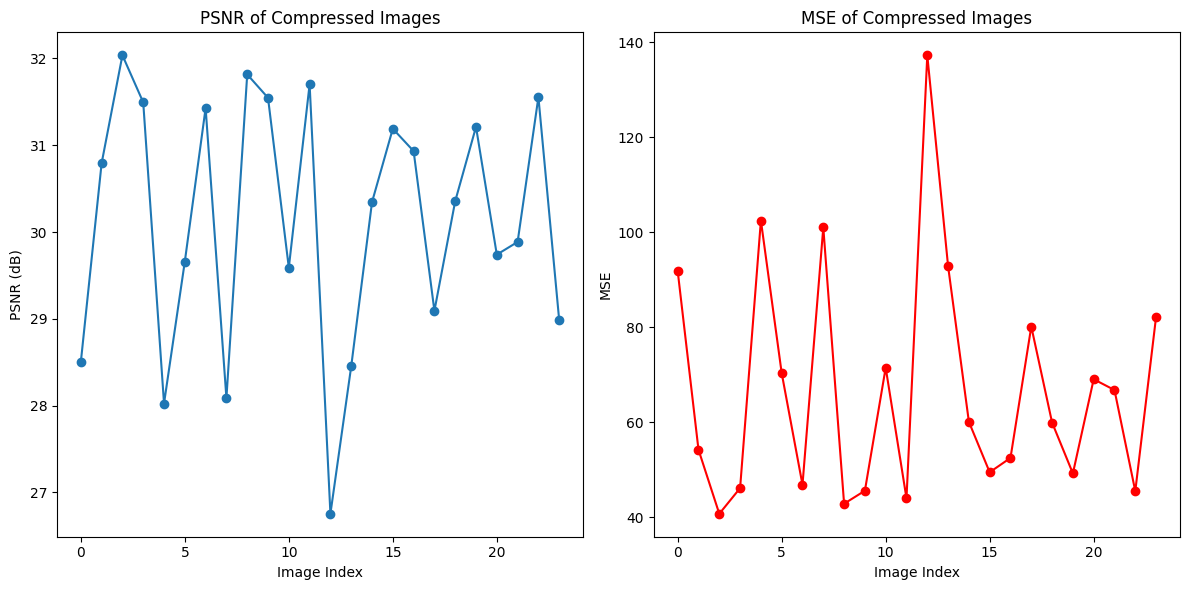

平均PSNR: 30.13 dB
平均MSE: 66.75


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse

# 定义文件路径
original_dir = "Kodak24"
compressed_dir = "CompressedImages"

# 获取所有图像文件名
original_images = sorted([f for f in os.listdir(original_dir) if os.path.isfile(os.path.join(original_dir, f))])
compressed_images = sorted([f for f in os.listdir(compressed_dir) if os.path.isfile(os.path.join(compressed_dir, f))])

# 确保图像数量相同
assert len(original_images) == len(compressed_images), "图像数量不匹配"

# 初始化结果列表
psnr_values = []
mse_values = []

# 遍历所有图像并计算PSNR和MSE
for orig_img_name, comp_img_name in zip(original_images, compressed_images):
    orig_img_path = os.path.join(original_dir, orig_img_name)
    comp_img_path = os.path.join(compressed_dir, comp_img_name)
    
    # 读取图像
    orig_img = io.imread(orig_img_path)
    comp_img = io.imread(comp_img_path)
    
    # 计算PSNR和MSE
    psnr_value = psnr(orig_img, comp_img)
    mse_value = mse(orig_img, comp_img)
    
    psnr_values.append(psnr_value)
    mse_values.append(mse_value)
    
    print(f"{orig_img_name} - PSNR: {psnr_value:.2f}, MSE: {mse_value:.2f}")

# 可视化结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(psnr_values, marker='o')
plt.title('PSNR of Compressed Images')
plt.xlabel('Image Index')
plt.ylabel('PSNR (dB)')

plt.subplot(1, 2, 2)
plt.plot(mse_values, marker='o', color='r')
plt.title('MSE of Compressed Images')
plt.xlabel('Image Index')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# 输出平均PSNR和MSE
print(f"平均PSNR: {np.mean(psnr_values):.2f} dB")
print(f"平均MSE: {np.mean(mse_values):.2f}")
